<a href="https://colab.research.google.com/github/codebysumaiya/Crater_Detection/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fcEgDpdpOvCVxFiQALIz")
project = rf.workspace("general-jhknr").project("object-detection-z1b0k")
version = project.version(1)
dataset = version.download("yolov5-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to object-detection-1 in yolov5-obb:: 100%|██████████| 192/192 [00:00<00:00, 5206.71it/s]


###The Above code is imported the manual Annotated Data

#Checking the data Whether it's Annotated Properly or Not

In [ ]:
import os

# Define the base dataset path
dataset_path = "object-detection-1"  # Adjust if needed

# Folders to check
splits = ['train', 'valid', 'test']
all_ok = True

for split in splits:
    image_dir = os.path.join(dataset_path, split, 'images')
    label_dir = os.path.join(dataset_path, split, 'labelTxt')  # Updated here

    print(f"\nChecking '{split}' split:")

    if not os.path.exists(image_dir):
        print(f"❌ Missing folder: {image_dir}")
        all_ok = False
        continue
    if not os.path.exists(label_dir):
        print(f"❌ Missing folder: {label_dir}")
        all_ok = False
        continue

    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))])
    label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    print(f"✅ Found {len(image_files)} images and {len(label_files)} labels.")

    for img in image_files:
        label = img.rsplit('.', 1)[0] + '.txt'
        if label not in label_files:
            print(f"⚠️  Missing label for image: {img}")
            all_ok = False

if all_ok:
    print("\n✅ Dataset is correctly downloaded with annotations.")
else:
    print("\n⚠️  Dataset has missing annotations or folder issues.")



Checking 'train' split:
✅ Found 70 images and 70 labels.

Checking 'valid' split:
✅ Found 15 images and 15 labels.

Checking 'test' split:
✅ Found 5 images and 5 labels.

✅ Dataset is correctly downloaded with annotations.


###Reading the yaml file

In [ ]:
import yaml

# Path to your YAML file
yaml_path = "object-detection-1/data.yaml"

# Load and display contents
with open(yaml_path, 'r') as stream:
    try:
        data = yaml.safe_load(stream)
        print("YAML Contents:\n")
        print(yaml.dump(data, sort_keys=False))  # Nicely formatted output

        print("\n--- Summary ---")
        print(f"Train images path: {data.get('train')}")
        print(f"Validation images path: {data.get('val')}")
        print(f"Test images path: {data.get('test')}")
        print(f"Number of classes: {data.get('nc')}")
        print(f"Class names: {data.get('names')}")

    except yaml.YAMLError as exc:
        print(f"Error reading YAML: {exc}")


YAML Contents:

path: ../datasets/roboflow
train: train/images
val: valid/images
test: test/images
nc: 2
names:
- b
- c


--- Summary ---
Train images path: train/images
Validation images path: valid/images
Test images path: test/images
Number of classes: 2
Class names: ['b', 'c']


###Checking all the images has it's annotation

In [ ]:
import os

# Path to your labels directory (change for valid/test as needed)
label_dir = "../object-detection-1/train/labelTxt"

# List the first few label files
label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

for file in label_files[:5]:  # check first 5 label files
    print(f"\n📄 File: {file}")
    with open(os.path.join(label_dir, file), "r") as f:
        lines = f.readlines()
        for line_num, line in enumerate(lines):
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"  ❌ Line {line_num+1} does NOT have 5 parts: {line.strip()}")
            else:
                class_id, xc, yc, w, h = parts
                print(f"  ✅ Line {line_num+1}: class={class_id}, xc={xc}, yc={yc}, w={w}, h={h}")



📄 File: -32-ch2_ohr_ncp_20231030T2358211985_b_brw_d18_slice_1_35_png.rf.a2c909b9ac7c3c894dd643d88c53a593.txt
  ❌ Line 1 does NOT have 5 parts: 640 485.0000000000001 567 485.0000000000001 567 640 640 640 b 0
  ❌ Line 2 does NOT have 5 parts: 85.00000000000003 171 16.00000000000002 171 16.000000000000025 258 85.00000000000003 258 c 0
  ❌ Line 3 does NOT have 5 parts: 345 214.00000000000006 311 214.00000000000006 311 254.00000000000006 345 254.00000000000006 c 0
  ❌ Line 4 does NOT have 5 parts: 467 461.0000000000001 424 461 424.00000000000006 519 467.0000000000001 519 c 0

📄 File: -16-ch2_ohr_ncp_20240403T1750244263_b_brw_d18_slice_3_30_png.rf.19ce950aabc10177869891eaf6654b2f.txt
  ❌ Line 1 does NOT have 5 parts: 118.00000000000006 290 2.0000000000000355 290 2.000000000000054 594 118.00000000000009 594 b 0

📄 File: -32-ch2_ohr_ncp_20231030T2358211985_b_brw_d18_slice_2_29_png.rf.1012c1c05330f3e80980693a815d140d.txt
  ❌ Line 1 does NOT have 5 parts: 483 8.000000000000053 376 8.00000000000

###Annotated all the images which is missed

In [ ]:
import os

def convert_labeltxt_to_yolo(input_folder, output_folder, class_map):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if not filename.endswith(".txt"):
            continue

        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        with open(input_path, "r") as infile, open(output_path, "w") as outfile:
            for line in infile:
                parts = line.strip().split()
                if len(parts) < 10:
                    continue  # skip malformed lines

                coords = list(map(float, parts[:8]))
                label = parts[8]

                xs = coords[0::2]
                ys = coords[1::2]

                x_min, x_max = min(xs), max(xs)
                y_min, y_max = min(ys), max(ys)

                x_center = (x_min + x_max) / 2
                y_center = (y_min + y_max) / 2
                width = x_max - x_min
                height = y_max - y_min

                # Normalize (optional): skip if training with unnormalized coordinates
                img_width = 640  # update with actual image size
                img_height = 640

                x_center /= img_width
                y_center /= img_height
                width /= img_width
                height /= img_height

                class_id = class_map.get(label, -1)
                if class_id == -1:
                    print(f"Unknown label: {label} in {filename}")
                    continue

                outfile.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

    print("✅ Conversion complete!")

# Example usage
convert_labeltxt_to_yolo(
    input_folder="../object-detection-1/train/labelTxt",
    output_folder="../object-detection-1/train/labels",
    class_map={"b": 0, "c": 1}
)


✅ Conversion complete!


In [ ]:
import os

yaml_path = "/content/object-detection-1/data.yaml"

yaml_content = """
train: /content/object-detection-1/train/images
val: /content/object-detection-1/valid/images
test: /content/object-detection-1/test/images
nc: 2
names: ['b', 'c']
"""

# Create parent directory if it doesn't exist
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)

with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"✅ Created: {yaml_path}")


✅ Created: /content/object-detection-1/data.yaml


In [ ]:
!cat /content/object-detection-1/data.yaml



train: /content/object-detection-1/train/images
val: /content/object-detection-1/valid/images
test: /content/object-detection-1/test/images
nc: 2
names: ['b', 'c']


###Training the Model

In [ ]:
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 50 \
  --data /content/object-detection-1/data.yaml \
  --weights yolov5s.pt \
  --project yolo_training \
  --name obb_model \
  --exist-ok \
  --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-19 07:29:47.941523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750318187.995237   43517 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750318188.011602   43517 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/object-detection-1/data.yaml, h

In [ ]:
%matplotlib inline


In [ ]:
!python detect.py \
  --weights yolo_training/obb_model/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/object-detection-1/test/images/-42-ch2_ohr_nrp_20240406T0647198831_b_brw_d18_slice_3_37_png.rf.638731d6e4db781a8102b1fa7279fc9e.jpg \
  --project runs/detect \
  --name obb_single_test \
  --exist-ok


detect: weights=['yolo_training/obb_model/weights/best.pt'], source=/content/object-detection-1/test/images/-42-ch2_ohr_nrp_20240406T0647198831_b_brw_d18_slice_3_37_png.rf.638731d6e4db781a8102b1fa7279fc9e.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=obb_single_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.7.1+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/object-detection-1/test/images/-42-ch2_ohr_nrp_20240406T0647198831_b_brw_d18_slice_3_37_png.rf.638731d6e4db781a8102b1fa7279fc9e.jpg: 640x640 1 b, 9 cs, 395.0ms
Speed: 3.6ms pre-p

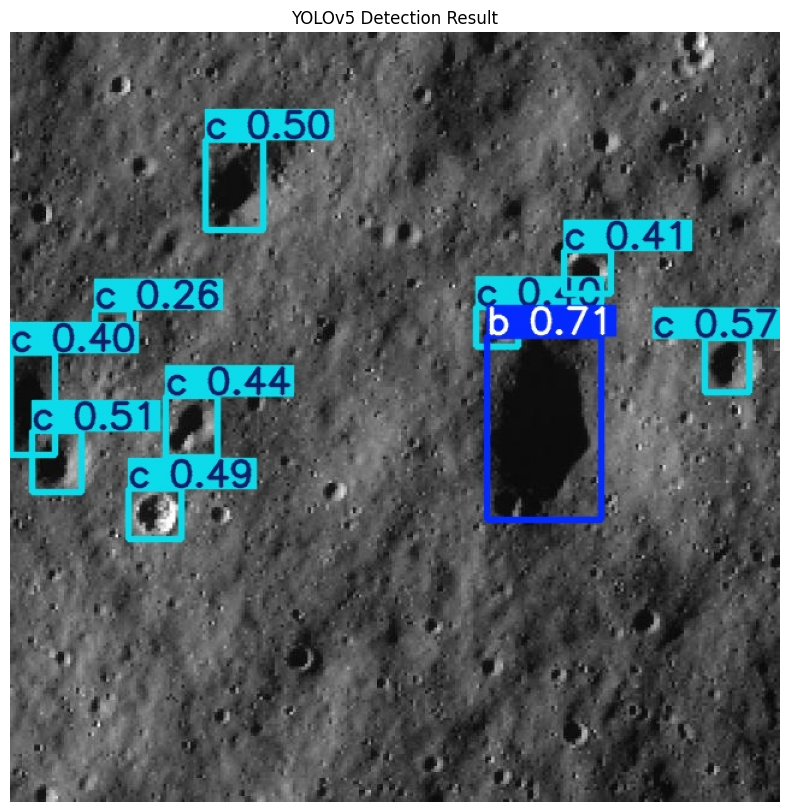

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = 'runs/detect/obb_single_test/-42-ch2_ohr_nrp_20240406T0647198831_b_brw_d18_slice_3_37_png.rf.638731d6e4db781a8102b1fa7279fc9e.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("YOLOv5 Detection Result")
plt.show()
